name 赤


Some weights of AlbertForPreTraining were not initialized from the model checkpoint at ALINEAR/albert-japanese-v2 and are newly initialized: ['sop_classifier.classifier.bias', 'sop_classifier.classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipykernel_67824/92686054.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X, dtype=torch.float32).to(device)


R,G,B e6 00 33
name 橙


Some weights of AlbertForPreTraining were not initialized from the model checkpoint at ALINEAR/albert-japanese-v2 and are newly initialized: ['sop_classifier.classifier.bias', 'sop_classifier.classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


R,G,B ee 78 00
name 黄


Some weights of AlbertForPreTraining were not initialized from the model checkpoint at ALINEAR/albert-japanese-v2 and are newly initialized: ['sop_classifier.classifier.bias', 'sop_classifier.classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


R,G,B ff d9 00
name 緑


Some weights of AlbertForPreTraining were not initialized from the model checkpoint at ALINEAR/albert-japanese-v2 and are newly initialized: ['sop_classifier.classifier.bias', 'sop_classifier.classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


R,G,B 3e b3 70
name 青


Some weights of AlbertForPreTraining were not initialized from the model checkpoint at ALINEAR/albert-japanese-v2 and are newly initialized: ['sop_classifier.classifier.bias', 'sop_classifier.classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


R,G,B 00 95 d9
name 藍


Some weights of AlbertForPreTraining were not initialized from the model checkpoint at ALINEAR/albert-japanese-v2 and are newly initialized: ['sop_classifier.classifier.bias', 'sop_classifier.classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


R,G,B 16 4a 83
name 紫


Some weights of AlbertForPreTraining were not initialized from the model checkpoint at ALINEAR/albert-japanese-v2 and are newly initialized: ['sop_classifier.classifier.bias', 'sop_classifier.classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


R,G,B 88 48 98
name 白


Some weights of AlbertForPreTraining were not initialized from the model checkpoint at ALINEAR/albert-japanese-v2 and are newly initialized: ['sop_classifier.classifier.bias', 'sop_classifier.classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


R,G,B ff ff ff
name 黒


Some weights of AlbertForPreTraining were not initialized from the model checkpoint at ALINEAR/albert-japanese-v2 and are newly initialized: ['sop_classifier.classifier.bias', 'sop_classifier.classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


R,G,B 2b 2b 2b
name 灰


Some weights of AlbertForPreTraining were not initialized from the model checkpoint at ALINEAR/albert-japanese-v2 and are newly initialized: ['sop_classifier.classifier.bias', 'sop_classifier.classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


R,G,B 7d 7d 7d


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

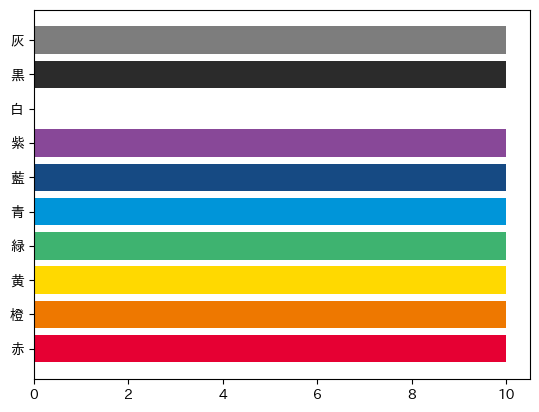

In [5]:
from torch.utils.data import Dataset, DataLoader
import torch
import pandas as pd
from transformers import AlbertTokenizer, AlbertForPreTraining
import time
import numpy as np

from model import Color

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def txt2clr(name, model):
    tokenizer = AlbertTokenizer.from_pretrained('ALINEAR/albert-japanese-v2')
    embed_model = AlbertForPreTraining.from_pretrained('ALINEAR/albert-japanese-v2')

    input_ids = torch.tensor(tokenizer.encode(name, add_special_tokens=True)).unsqueeze(0)  # Batch size 1
    outputs = embed_model(input_ids)

    X = outputs.prediction_logits
    X = torch.sum(X, 1).squeeze(1)
    X = torch.tensor(X, dtype=torch.float32).to(device)
    R_out, G_out, B_out = model(X)
    R = torch.argmax(R_out)
    G = torch.argmax(G_out)
    B = torch.argmax(B_out)
    colorcode = rgb2html(R, G, B)
    return colorcode
    

def rgb2html(R, G, B):
    r = hex(R)
    g = hex(G)
    b = hex(B)
    if len(r) == 3:
        r = r.replace('0x', '0')
    else:
        r = r.replace('0x', '')
    if len(g) == 3:
        g = g.replace('0x', '0')
    else:
        g = g.replace('0x', '')
    if len(b) == 3:
        b = b.replace('0x', '0')
    else:
        b = b.replace('0x', '')
    print('R,G,B',r,g,b)
    color_code = '#{}{}{}'.format(r,g,b)
    return color_code

def html2rgb(color_code):
    R = int(color_code[1:3], 16)
    G = int(color_code[3:5], 16)
    B = int(color_code[5:7], 16)
    return [R, G, B]


import matplotlib.pyplot as plt
import numpy as np
import japanize_matplotlib

#namelist = ['天鵞絨', '肉桂色', '赤', '橙', '黄', '緑', '青', '藍', '紫']
#namelist = ['赤色', '赤', '橙色', '橙', '黄色', '黄', '緑色', '緑', '青色', '青', '藍色', '藍', '紫色', '紫', '白色', '白', '黒色', '黒', '灰色', '灰']
namelist = ['赤', '橙', '黄', '緑', '青', '藍', '紫', '白', '黒', '灰']
#namelist = ['赤色', '橙色', '黄色', '緑色', '青色', '藍色', '紫色', '白色', '黒色', '灰色']
#namelist = ['宍色', '海松茶', '青緑', '蒲葡染', '萌黄', '人参色', '山吹色', '濡羽色']
#namelist = ['海松茶','海','松','茶','海松','松茶','海茶']
#namelist = ['松竹梅','松竹梅', '松','竹','梅','松竹','竹梅','松梅']
#namelist = ['天色', '露草色', '青', '薄藍', '縹色']
#namelist = ['青い服']
#namelist =  ['青い空', '白い雲', '緑の草原']

len_ = len(namelist)
model = Color(in_dim = 35000).to(device)
pre = './RGB_layer_ep240.pth'
model.load_state_dict(torch.load(pre))
colorlist = []
for name in namelist: 
    print('name', name)
    colorcode = txt2clr(name, model)
    fig = plt.figure()
    fig.patch.set_facecolor('white')

    colorlist.append(str(colorcode))

x = np.arange(1, len_+1)
height = 10
plt.barh(x, height, color=colorlist, tick_label=namelist, align="center")
plt.savefig('Color' + '.png')

plt.show()

